In [1]:
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
X, y = make_classification(weights=[0.73], random_state=2022)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2022)

# Exercise 1

### fit a support vector machine on the train data and measure its performance on the training and testing data

In [3]:
model = SVC(random_state=2022).fit(X_train, y_train)
print(
    f"training performance: {model.score(X_train, y_train)}",
    f"testing performance: {model.score(X_test, y_test)}",
    sep="\n"
)

training performance: 1.0
testing performance: 0.88


# Exercise 2

### measure the errors we have made per class

In [4]:
(pd.DataFrame(
    {
        "true_label": y_test,
        "is_correct": y_test == model.predict(X_test)
    })
 .groupby("true_label")
 .mean()
)

,is_correct
true_label,
0,1.000000
1,0.571429


# Exercise 3

### plot a histogram of the y labels of the training data

<AxesSubplot:ylabel='Probability'>

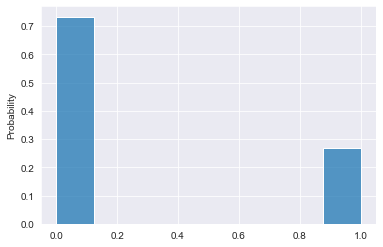

In [5]:
sns.histplot(y_train, stat="probability")

# Exercise 3

### fit the model again with weights

In [6]:
model_balanced = (
    SVC(
        class_weight="balanced", 
        random_state=2022,
    )
    .fit(X_train, y_train)
)
print(
    f"training performance: {model_balanced.score(X_train, y_train)}",
    f"testing performance: {model_balanced.score(X_test, y_test)}",
    sep="\n"
)

training performance: 0.9733333333333334
testing performance: 0.96


In [7]:
(pd.DataFrame(
    {
        "true_label": y_test,
        "is_correct": y_test == model_balanced.predict(X_test)
    })
 .groupby("true_label")
 .mean()
)

,is_correct
true_label,
0,0.944444
1,1.000000


# Extra exercise

### Try this method (balanced classes) with other algorithms like decision trees, random forests, logistic regression. Would it work?